In [1]:
!nvidia-smi

Thu Mar 16 22:08:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:26:00.0  On |                  N/A |
|  0%   43C    P0    33W / 170W |    935MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      788992    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      384832    
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      751232    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 32)        1

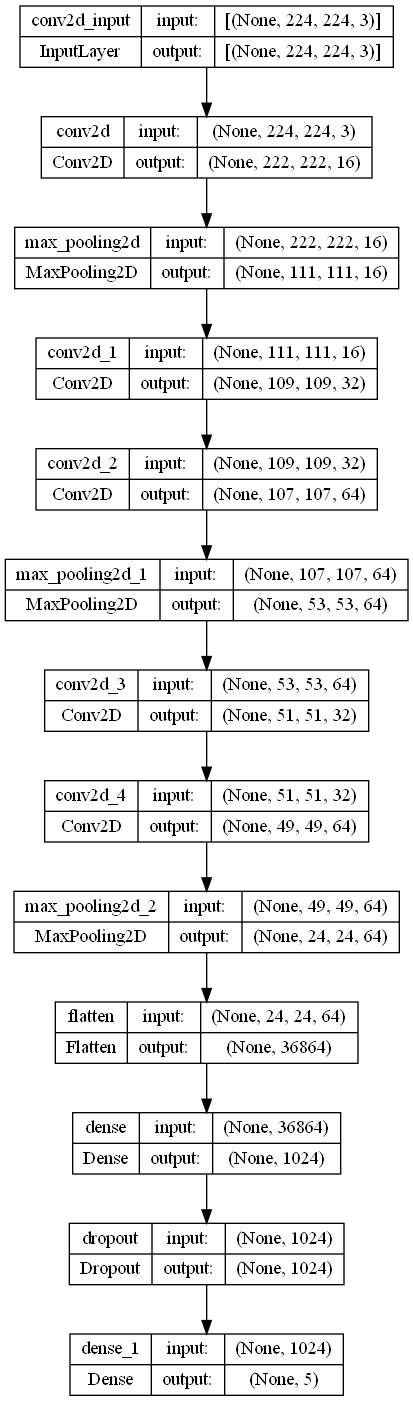

In [2]:
### model

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
from tensorflow.keras.utils import plot_model
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

class_num = 5



model = Sequential()
model.add(Conv2D(16,(3,3),activation='PReLU',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='PReLU'))
model.add(Conv2D(64,(3,3),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='PReLU'))
model.add(Conv2D(64,(3,3),activation='PReLU'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(1024,activation='PReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, to_file='BaseModel2.png')

In [3]:
op = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  brightness_range=(0.4, 0.7),
                                  vertical_flip= True,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\val',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test',
                                           target_size = (224,224),
                                           batch_size = 1,
                                           class_mode = 'categorical')



model.optimizer.get_config()

Found 23227 images belonging to 5 classes.
Found 2902 images belonging to 5 classes.
Found 2906 images belonging to 5 classes.


{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

filepath = r"D:\Visual Disorders\Dimension Ratio\WEIGHT\64retnet801010.h5"



checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'D:\Visual Disorders\CSV\64retnet801010.csv', separator=',', append=False)

callbacks_list = [checkpoint1,log_csv]



r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

Epoch 1/100


C:\Users\USER\AppData\Local\Temp\ipykernel_2832\3177529650.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


726/726 [==============================] - ETA: 0s - loss: 1.3606 - accuracy: 0.4180
Epoch 1: val_accuracy improved from -inf to 0.50241, saving model to D:\Visual Disorders\Dimension Ratio\WEIGHT\64retnet801010.h5
726/726 [==============================] - 96s 127ms/step - loss: 1.3606 - accuracy: 0.4180 - val_loss: 1.2570 - val_accuracy: 0.5024
Epoch 2/100
726/726 [==============================] - ETA: 0s - loss: 0.9581 - accuracy: 0.6232
Epoch 2: val_accuracy improved from 0.50241 to 0.69263, saving model to D:\Visual Disorders\Dimension Ratio\WEIGHT\64retnet801010.h5
726/726 [==============================] - 51s 70ms/step - loss: 0.9581 - accuracy: 0.6232 - val_loss: 0.8517 - val_accuracy: 0.6926
Epoch 3/100
726/726 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.7815
Epoch 3: val_accuracy improved from 0.69263 to 0.82495, saving model to D:\Visual Disorders\Dimension Ratio\WEIGHT\64retnet801010.h5
726/726 [==============================] - 51s 71ms/step -

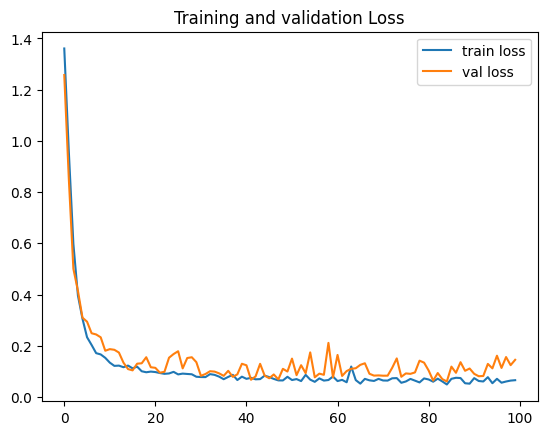

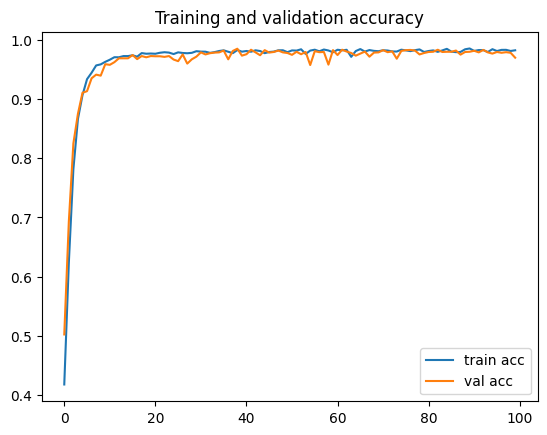

<Figure size 640x480 with 0 Axes>

In [6]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
model.load_weights(filepath)
Adam = keras.optimizers.Adam(lr=0.001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\USER\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_2832\3381981596.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.06218736991286278
Test Accuracy =  98.62353801727295


In [8]:
### for f1 score and other values import files ### 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [9]:
### predicting on test set ### updated!!!!!

probaa=[]
import os
import matplotlib.pyplot as plt
model.load_weights(filepath)

### give directory of all classes in test set in order as shown in your colab directory..
### class order is case sensitive!!!

dir_path1=r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test\0'
dir_path2=r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test\1'
dir_path3=r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test\2'
dir_path4=r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test\3'
dir_path5=r'D:\Visual Disorders\Dimension Ratio\80 10 10\64\Split\test\4'



for filename in os.listdir(dir_path1):
    img=image.load_img(dir_path1+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

for filename in os.listdir(dir_path2):
    img=image.load_img(dir_path2+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

    
for filename in os.listdir(dir_path3):
    img=image.load_img(dir_path3+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

for filename in os.listdir(dir_path4):
    img=image.load_img(dir_path4+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

for filename in os.listdir(dir_path5):
    img=image.load_img(dir_path5+'//'+filename, target_size=(224,224,3))
    im = []
    img = image.img_to_array(img)
    img = img/255
    im.append(img)
    X= np.array(im)
    result=model.predict(X,verbose=0)
    #training_set.class_indices
    res=np.argmax(result)
    probaa.append(res)

In [10]:
### making true label ###

y_val=[]
for x in range (588):
  y_val.append(0)

for x in range (590):
  y_val.append(1)
for x in range (589):
  y_val.append(2)
for x in range (578):
  y_val.append(3)
for x in range (561):
  y_val.append(4)


In [11]:
### for f1 score and other values import files ### 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

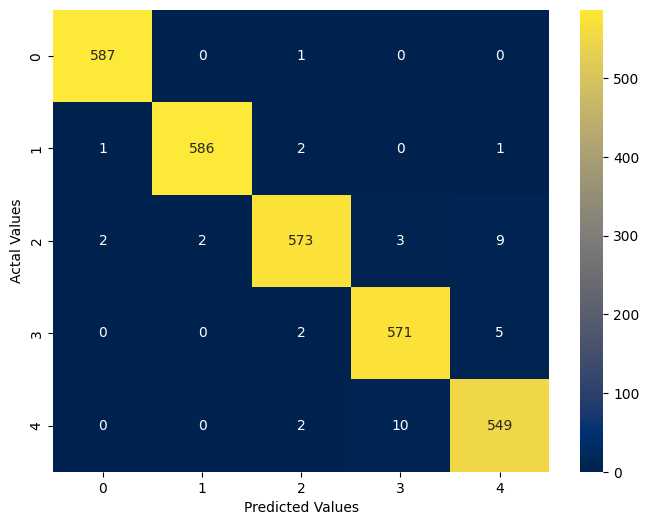

In [12]:
y_preD=probaa

cm = confusion_matrix(y_val, y_preD)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4'],## type in name of classes inorder as shown in colab directory
                     columns = ['0','1','2','3','4'])## same


plt.figure(figsize=(8,6))
sns.heatmap(cm_df,cmap='cividis', annot=True, fmt='d')
#plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
#plt.savefig("/content/drive/MyDrive/3D brain/fig/Fin_Adamax0.0001.png", dpi = 300)
plt.show()

In [13]:
### all values ###

y_preD=probaa

confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_val) - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean

MAE=mean_absolute_error(y_val, y_preD)
MSE=mean_squared_error(y_val, y_preD)
F1=2*((mean(PPV)*mean(TPR))/(mean(PPV)+mean(TPR)))

print("ACC=   ",mean(ACC)*100)

print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("F1=    ",mean(F1)*100)


print("MAE   =",MAE*100) ##mean absolute error
print("RMSE  =",math.sqrt(MSE)*100) ### root mean squared error

### if shows error import files again
### all values ###

y_preD=probaa

confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_val) - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean

MAE=mean_absolute_error(y_val, y_preD)
MSE=mean_squared_error(y_val, y_preD)
F1=2*((mean(PPV)*mean(TPR))/(mean(PPV)+mean(TPR)))

print("ACC=   ",mean(ACC)*100)

print("Rec=   ",mean(TPR)*100)
print("Spe=   ",mean(TNR)*100)
print("Pre=   ",mean(PPV)*100)
print("FPR=   ",mean(FPR)*100)
print("FNR=   ",mean(FNR)*100)
print("NPV=   ",mean(NPV)*100)
print("FDR=   ",mean(FDR)*100)
print("F1=    ",mean(F1)*100)


print("MAE   =",MAE*100) ##mean absolute error
print("RMSE  =",math.sqrt(MSE)*100) ### root mean squared error

### if shows error import files again


ACC=    99.44941500344115
Rec=    98.61707743654947
Spe=    99.65680588049845
Pre=    98.61177819044752
FPR=    0.3431941195015409
FNR=    1.3829225634505318
NPV=    99.65650730738466
FDR=    1.3882218095524945
F1=     98.61442774230704
MAE   = 1.9270474879559532
RMSE  = 17.598410739732994
ACC=    99.44941500344115
Rec=    98.61707743654947
Spe=    99.65680588049845
Pre=    98.61177819044752
FPR=    0.3431941195015409
FNR=    1.3829225634505318
NPV=    99.65650730738466
FDR=    1.3882218095524945
F1=     98.61442774230704
MAE   = 1.9270474879559532
RMSE  = 17.598410739732994
